###### In this project, I will be performing exploratory data analysis using univariate, bivariate, and multivariate techniques to gain valuable insights that can contribute to actionable decision making.


Importing Libraries Needed for Analysis and Visualizations

###### Numpy for numerical computations
###### Pandas for reading in data and data manipulation
###### Matplotlib.pyplot for visualizations
###### Seaborn for visualizing data

In [2]:
import numpy as np 
import pandas as pd 
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
import seaborn as sns

Reading Data into DataFrame for Analysis

###### Reading an excel file stored on my local machine into a dataframe

In [3]:
USRegional_Sales = pd.read_excel(r"C:\Users\Jason\OneDrive\US_Regional_Sales_Data.xlsx")

Viewing the first 3 rows of data

###### To get a quick preview of what the first few rows look like, checking for consistency

In [4]:
USRegional_Sales.head(3)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1001.18,1963.1
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3348.66,3939.6
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,781.22,1775.5


Viewing the last 3 rows of data

###### To get a quick preview of what the last few rows look like, checking the consistency

In [5]:
USRegional_Sales.tail(3)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,USD,14,32,241,35,5,0.200,2792.76,3825.7
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,USD,20,42,112,36,8,0.100,804.00,1072.0
7990,SO - 0008091,In-Store,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-13,2021-01-19,USD,6,41,237,43,5,0.075,1370.82,2211.0


Checking the number of rows and columns of the dataframe

###### Getting a better understanding of how big or small the dataset may be

In [6]:
USRegional_Sales.shape

(7991, 16)

Checking the datatypes 

###### Making sure all datatype are in the correct format

In [7]:
USRegional_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Cost         7991 n

Checking for duplicates

###### Verifying if there are any duplicate rows of data, having duplicates can effect the accuracy of analysis or calculations

In [8]:
USRegional_Sales.duplicated().sum()

0

Checking null values

###### Searching for rows that may not have any values 

In [9]:
for na in USRegional_Sales.columns:
    null_values = USRegional_Sales[na].isna().sum()
    print(f"{na} has {null_values} null values")

OrderNumber has 0 null values
Sales Channel has 0 null values
WarehouseCode has 0 null values
ProcuredDate has 0 null values
OrderDate has 0 null values
ShipDate has 0 null values
DeliveryDate has 0 null values
CurrencyCode has 0 null values
_SalesTeamID has 0 null values
_CustomerID has 0 null values
_StoreID has 0 null values
_ProductID has 0 null values
Order Quantity has 0 null values
Discount Applied has 0 null values
Unit Cost has 0 null values
Unit Price has 0 null values


Checking the unique values

###### Getting a feel of how many unique values a particular column may have

In [10]:
for col in USRegional_Sales.columns:
    unique_values = USRegional_Sales[col].nunique()
    print(f"{col} has {unique_values} unique values")

OrderNumber has 7991 unique values
Sales Channel has 4 unique values
WarehouseCode has 6 unique values
ProcuredDate has 11 unique values
OrderDate has 945 unique values
ShipDate has 966 unique values
DeliveryDate has 966 unique values
CurrencyCode has 1 unique values
_SalesTeamID has 28 unique values
_CustomerID has 50 unique values
_StoreID has 367 unique values
_ProductID has 47 unique values
Order Quantity has 8 unique values
Discount Applied has 7 unique values
Unit Cost has 5252 unique values
Unit Price has 664 unique values


Performing Data Analysis and Data Cleaning

Adding new columns to the dataset

###### Adding year, month and day of the week to all date columns by extracting them from the original date columns for potential time series analysis

In [11]:
USRegional_Sales["ProcuredYear"] = USRegional_Sales["ProcuredDate"].dt.year
USRegional_Sales["ProcuredMonth"] = USRegional_Sales.ProcuredDate.dt.month_name()
USRegional_Sales["ProcuredDay"] = USRegional_Sales.ProcuredDate.dt.day_name()
USRegional_Sales["OrderYear"] = USRegional_Sales["OrderDate"].dt.year
USRegional_Sales["OrderMonth"] = USRegional_Sales.OrderDate.dt.month_name()
USRegional_Sales["OrderDay"] = USRegional_Sales.OrderDate.dt.day_name()
USRegional_Sales["ShipYear"] = USRegional_Sales["ShipDate"].dt.year
USRegional_Sales["ShipMonth"] = USRegional_Sales.ShipDate.dt.month_name()
USRegional_Sales["ShipDay"] = USRegional_Sales.ShipDate.dt.day_name()
USRegional_Sales["DeliveryYear"] = USRegional_Sales["ShipDate"].dt.year
USRegional_Sales["DeliveryMonth"] = USRegional_Sales.DeliveryDate.dt.month_name()
USRegional_Sales["DeliveryDay"] = USRegional_Sales.DeliveryDate.dt.day_name()

Checking columns

###### Verifying that the updated columns have been added saved to the dataframe

In [14]:
USRegional_Sales.head(1)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,ProcuredYear,ProcuredMonth,ProcuredDay,OrderYear,OrderMonth,OrderDay,ShipYear,ShipMonth,ShipDay,DeliveryYear,DeliveryMonth,DeliveryDay
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1001.18,1963.1,2017,December,Sunday,2018,May,Thursday,2018,June,Thursday,2018,June,Tuesday


Count of orders by year

###### Viewing the number of orders by year

In [23]:
USRegional_Sales.groupby("OrderYear")["OrderNumber"].count()

OrderYear
2018    1836
2019    3030
2020    3125
Name: OrderNumber, dtype: int64

Count of orders by month

###### Viewing the number of orders by month

In [29]:
USRegional_Sales.groupby("OrderMonth")["OrderNumber"].count()

OrderMonth
April        533
August       791
December     791
February     502
January      569
July         795
June         740
March        449
May          550
November     781
October      745
September    745
Name: OrderNumber, dtype: int64

Count of orders by day

###### Viewing the number of orders by day

In [30]:
USRegional_Sales.groupby("OrderDay")["OrderNumber"].count()

OrderDay
Friday       1112
Monday       1146
Saturday     1194
Sunday       1158
Thursday     1168
Tuesday      1114
Wednesday    1099
Name: OrderNumber, dtype: int64

Count of orders by customers per year

###### Viewing the number of orders placed by a customer each year

In [39]:
USRegional_Sales.groupby(["_CustomerID", "OrderYear"])["OrderYear"].count()

_CustomerID  OrderYear
1            2018         27
             2019         62
             2020         63
2            2018         23
             2019         53
                          ..
49           2019         59
             2020         51
50           2018         36
             2019         58
             2020         69
Name: OrderYear, Length: 150, dtype: int64

Count of orders by customers per month

###### Viewing the number of orders placed by a customer each month

In [37]:
USRegional_Sales.groupby(["_CustomerID", "OrderMonth"])["OrderMonth"].count()

_CustomerID  OrderMonth
1            April         12
             August        16
             December      12
             February       6
             January        9
                           ..
50           March          7
             May           14
             November      19
             October       15
             September     20
Name: OrderMonth, Length: 600, dtype: int64

Count of orders by customers per day

###### Viewing the number of orders placed by a customer each day

In [35]:
USRegional_Sales.groupby(["_CustomerID", "OrderDay"])["OrderDay"].count()

_CustomerID  OrderDay 
1            Friday       21
             Monday       15
             Saturday     24
             Sunday       23
             Thursday     20
                          ..
50           Saturday     23
             Sunday       23
             Thursday     25
             Tuesday      19
             Wednesday    23
Name: OrderDay, Length: 350, dtype: int64

Min/Avg/Max unit prices by year

###### View of the min/avg/max unit prices sold by each year

In [44]:
USRegional_Sales.groupby("OrderYear")["Unit Price"].agg(["min", "mean", "max"])

,min,mean,max
OrderYear,,,
2018,167.5,2278.372222,6566.0
2019,167.5,2296.353135,6559.3
2020,167.5,2276.700736,6559.3


Min/Avg/Max unit prices by month

###### View of the min/avg/max unit prices sold by each month

In [56]:
USRegional_Sales.groupby("OrderMonth")["Unit Price"].agg(["min", "mean", "max"])

,min,mean,max
OrderMonth,,,
April,167.5,2252.318762,6552.6
August,167.5,2301.208597,6532.5
December,167.5,2279.219722,6566.0
February,167.5,2229.538446,6559.3
January,167.5,2431.146221,6545.9
July,167.5,2248.022767,6559.3
June,167.5,2332.288108,6545.9
March,167.5,2249.155679,6432.0
May,167.5,2212.620182,6525.8


Min/Avg/Max unit prices by day

###### View of the min/avg/max unit prices sold by each day

In [57]:
USRegional_Sales.groupby("OrderDay")["Unit Price"].agg(["min", "mean", "max"])

,min,mean,max
OrderDay,,,
Friday,167.5,2258.466367,6539.2
Monday,167.5,2257.742147,6559.3
Saturday,167.5,2217.172529,6545.9
Sunday,167.5,2317.488342,6559.3
Thursday,167.5,2392.238442,6559.3
Tuesday,167.5,2303.873788,6525.8
Wednesday,167.5,2243.256324,6566.0


Min/Avg/Max unit prices per customer by year

###### View of the min/avg/max unit prices bought per customer by year

In [55]:
USRegional_Sales.groupby(["_CustomerID", "OrderYear"])["Unit Price"].agg(["min", "mean", "max"])

min         mean     max
_CustomerID OrderYear                            
1           2018       174.2  2376.018519  5721.8
            2019       187.6  2117.848387  6492.3
            2020       167.5  1951.826984  6050.1
2           2018       268.0  2133.221739  6505.7
            2019       221.1  2073.333962  6438.7
...                      ...          ...     ...
49          2019       180.9  2211.227119  6438.7
            2020       180.9  2339.350980  6452.1
50          2018       174.2  2377.941667  6525.8
            2019       201.0  2219.779310  6519.1
            2020       180.9  2466.376812  6478.9

[150 rows x 3 columns]

Min/Avg/Max unit prices per customer by month

###### View of the min/avg/max unit prices bought per customer by month

In [58]:
USRegional_Sales.groupby(["_CustomerID", "OrderMonth"])["Unit Price"].agg(["min", "mean", "max"])

min         mean     max
_CustomerID OrderMonth                            
1           April       214.4  1675.558333  3879.3
            August      180.9  2298.100000  6492.3
            December    187.6  1849.200000  4006.6
            February    261.3  1685.050000  2726.9
            January     207.7  2718.711111  5996.5
...                       ...          ...     ...
50          March       207.7  2035.842857  3859.2
            May         201.0  1489.314286  2619.7
            November    723.6  3161.342105  6298.0
            October     187.6  1831.333333  5333.2
            September   268.0  2205.975000  6519.1

[600 rows x 3 columns]

Min/Avg/Max unit prices per customer by day

###### View of the min/avg/max unit prices bought per customer by day

In [59]:
USRegional_Sales.groupby(["_CustomerID", "OrderDay"])["Unit Price"].agg(["min", "mean", "max"])

min         mean     max
_CustomerID OrderDay                             
1           Friday     214.4  1793.685714  5708.4
            Monday     180.9  1355.186667  5098.7
            Saturday   167.5  2516.966667  6050.1
            Sunday     174.2  2372.965217  5246.1
            Thursday   187.6  2515.180000  5996.5
...                      ...          ...     ...
50          Saturday   207.7  1959.604348  3999.9
            Sunday     187.6  2103.800000  6298.0
            Thursday   174.2  2558.864000  6378.4
            Tuesday    207.7  2833.394737  6525.8
            Wednesday  207.7  2516.286957  6519.1

[350 rows x 3 columns]

Count of products sold by year

###### View of the number of products sold by year

In [70]:
USRegional_Sales.groupby("OrderYear")["_ProductID"].value_counts()

OrderYear  _ProductID
2018       11            59
           23            52
           12            51
           37            51
           8             50
                         ..
2020       15            58
           10            57
           39            52
           47            51
           44            41
Name: _ProductID, Length: 141, dtype: int64

Count of products sold by month

###### View of the number of products sold by month

In [71]:
USRegional_Sales.groupby("OrderMonth")["_ProductID"].value_counts()

OrderMonth  _ProductID
April       4             18
            29            17
            14            16
            31            16
            38            16
                          ..
September   35            12
            20            11
            2             10
            14            10
            24            10
Name: _ProductID, Length: 564, dtype: int64

Count of products sold by day

###### View of the number of products sold by day

In [72]:
USRegional_Sales.groupby("OrderDay")["_ProductID"].value_counts()

OrderDay   _ProductID
Friday     33            34
           29            33
           8             31
           23            31
           4             29
                         ..
Wednesday  14            17
           30            17
           15            15
           44            15
           40            12
Name: _ProductID, Length: 329, dtype: int64

Count of order quantity sold by each sales team member

###### View of the number of orders sold by each sales team member

In [117]:
USRegional_Sales.groupby("_SalesTeamID")["Order Quantity"].count()

_SalesTeamID
1     302
2     246
3     296
4     292
5     283
6     265
7     303
8     315
9     285
10    260
11    289
12    314
13    340
14    261
15    271
16    298
17    275
18    316
19    293
20    288
21    296
22    266
23    277
24    284
25    259
26    296
27    274
28    247
Name: Order Quantity, dtype: int64

Avg unit price sold by each sales member

###### View of the avg unit price sold by each sales member

In [121]:
USRegional_Sales.groupby("_SalesTeamID")["Unit Price"].mean()

_SalesTeamID
1     2328.627152
2     2414.805285
3     2190.718919
4     2187.274658
5     2125.036396
6     2200.482264
7     2321.052475
8     2315.371111
9     2269.513333
10    2239.114231
11    2387.866090
12    2348.392675
13    2175.411176
14    2282.286973
15    2383.197417
16    2266.263758
17    2313.351636
18    2190.497152
19    2431.002389
20    2221.585069
21    2162.968243
22    2354.697368
23    2296.503610
24    2526.065141
25    2333.100386
26    2398.826351
27    2189.677372
28    2130.789879
Name: Unit Price, dtype: float64

Count of order quantity sold by sales channel

###### View of the number of orders sold by each sales channel

In [116]:
USRegional_Sales.groupby("Sales Channel")["Order Quantity"].count()

Sales Channel
Distributor    1375
In-Store       3298
Online         2425
Wholesale       893
Name: Order Quantity, dtype: int64

Avg unit price sold per sales channel

###### View of the avg price of a unit by each sales channel 

In [120]:
USRegional_Sales.groupby("Sales Channel")["Unit Price"].mean()

Sales Channel
Distributor    2328.554545
In-Store       2270.215161
Online         2286.534557
Wholesale      2264.224860
Name: Unit Price, dtype: float64

Avg unit price by customer and year

###### View of the avg order price by customers per year

In [131]:
USRegional_Sales.groupby(["OrderYear", "_CustomerID"])["Unit Price"].mean()

OrderYear  _CustomerID
2018       1              2376.018519
           2              2133.221739
           3              2032.721739
           4              2507.307500
           5              1924.947222
                             ...     
2020       46             2412.679710
           47             2130.304412
           48             1936.300000
           49             2339.350980
           50             2466.376812
Name: Unit Price, Length: 150, dtype: float64

Top 10 avg unit price by customer and year

###### View of the top 10 avg order price by customers per year

In [130]:
USRegional_Sales.groupby(["OrderYear", "_CustomerID"])["Unit Price"].mean().sort_values(ascending=False)[:10]

OrderYear  _CustomerID
2018       27             2917.984000
           43             2822.933333
           17             2763.005556
           15             2747.372222
           36             2740.858333
2019       5              2697.866667
           16             2668.088889
2018       22             2663.821951
2020       34             2651.677273
           33             2651.360784
Name: Unit Price, dtype: float64

Avg unit price by customer and month

###### View of the avg order price by customer and month

In [124]:
USRegional_Sales.groupby(["OrderMonth", "_CustomerID"])["Unit Price"].mean()

OrderMonth  _CustomerID
April       1              1675.558333
            2              2561.912500
            3              2948.957143
            4              1654.006667
            5              2619.253333
                              ...     
September   46             2111.170000
            47             1479.481818
            48             2627.009091
            49             2141.938462
            50             2205.975000
Name: Unit Price, Length: 600, dtype: float64

Avg unit price by customer

###### View of the avg order price by each customer

In [132]:
USRegional_Sales.groupby("_CustomerID")["Unit Price"].mean()

_CustomerID
1     2094.896053
2     2145.985185
3     2102.541436
4     2304.238323
5     2285.922013
6     2335.488811
7     2150.524837
8     2234.355634
9     2219.149708
10    2323.161392
11    2361.825281
12    2342.894286
13    2349.976023
14    2261.015287
15    2443.046479
16    2452.696296
17    2405.606286
18    2358.796237
19    2219.892727
20    2058.665269
21    2427.932927
22    2444.830000
23    2308.190854
24    2250.223841
25    2325.065432
26    2232.939216
27    2075.511111
28    2378.869655
29    2458.151397
30    2176.151572
31    2244.147368
32    2316.650867
33    2341.134615
34    2479.723295
35    2127.781379
36    2422.221795
37    2270.991447
38    2234.896667
39    2238.751705
40    2322.488000
41    2313.663975
42    2212.373292
43    2421.495364
44    2224.013462
45    2387.991667
46    2235.026115
47    2085.375000
48    2144.584302
49    2281.394079
50    2359.098773
Name: Unit Price, dtype: float64

Avg markup or profit per unit

###### View of the avg markup or profit per unit 

In [146]:
avg_markup_price = USRegional_Sales["Unit Price"].mean() - USRegional_Sales["Unit Cost"].mean()
avg_markup_price
print(f"The average markup per unit is ${round(avg_markup_price, 2)}")

The average markup per unit is $852.62


Avg markup or profit per unit by year

###### View of the avg markup or profit per unit by year

In [373]:
avg_markup_price_by_year = USRegional_Sales.groupby("OrderYear")["Unit Price"].mean()
avg_markup_price_by_year

OrderYear
2018    2278.372222
2019    2296.353135
2020    2276.700736
Name: Unit Price, dtype: float64

Avg markup or profit per unit by month

###### View of the avg markup or profit per unit by month

In [400]:
avg_markup_price_by_month = USRegional_Sales.groupby("OrderMonth")["Unit Price"].mean()
avg_markup_price_by_month

OrderMonth
April        2252.318762
August       2301.208597
December     2279.219722
February     2229.538446
January      2431.146221
July         2248.022767
June         2332.288108
March        2249.155679
May          2212.620182
November     2335.288860
October      2241.730067
September    2276.165369
Name: Unit Price, dtype: float64

Avg markup or profit per unit by day

###### View of the avg markup or profit per unit by day

In [401]:
avg_markup_price_by_day = USRegional_Sales.groupby("OrderDay")["Unit Price"].mean()
avg_markup_price_by_day

OrderDay
Friday       2258.466367
Monday       2257.742147
Saturday     2217.172529
Sunday       2317.488342
Thursday     2392.238442
Tuesday      2303.873788
Wednesday    2243.256324
Name: Unit Price, dtype: float64

Data Visualizations

###### Number of Orders by Year Countplot

The year 2020 experienced the most orders placed


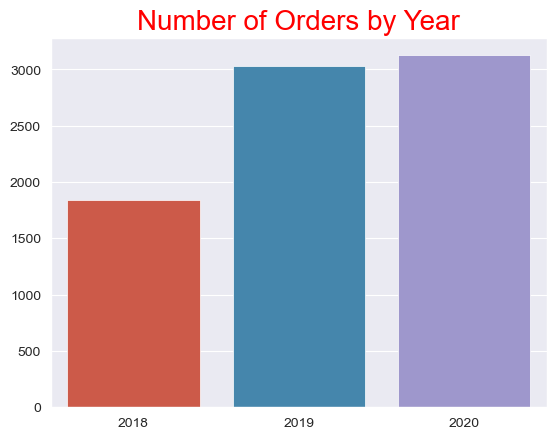

In [279]:
sns.countplot(x="OrderYear", data=USRegional_Sales),
plt.title("Number of Orders by Year", fontsize=20, color="red"),
plt.ylabel(""),
plt.xlabel("")
sns.set_style("darkgrid")
print("The year 2020 experienced the most orders placed") 

###### Number of Orders by Month Countplot

The month of July experienced the highest number of orders, with the months of August and December tied for second


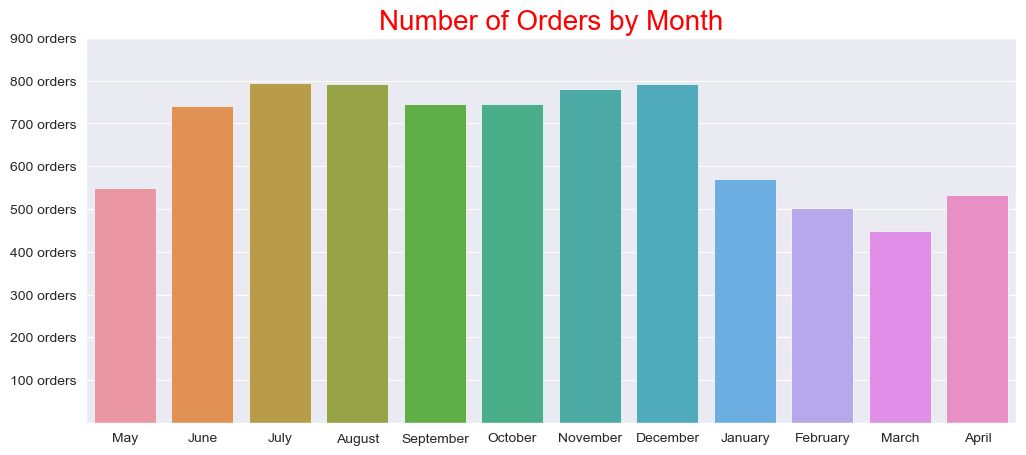

In [278]:
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
sns.countplot(x="OrderMonth", data=USRegional_Sales),
plt.title("Number of Orders by Month", fontsize=20, color="red"),
plt.ylabel(""),
plt.xlabel("")
ticks = list(range(100, 1000, 100))
plt.yticks(ticks, [f"{x} orders" for x in ticks])
print("The month of July experienced the highest number of orders, with the months of August and December tied for second")


###### Number of Orders by Day Countplot

The most number of orders take place on Saturdays


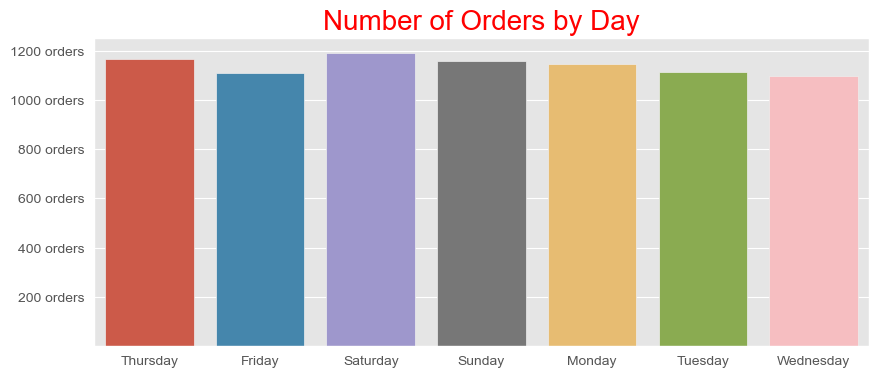

In [277]:
plt.figure(figsize=(10,4))
sns.countplot(x="OrderDay", data=USRegional_Sales)
plt.title("Number of Orders by Day", fontsize=20, color="red")
plt.xlabel(""),
plt.ylabel("") 
sns.set_style("darkgrid")
ticks = list(range(200, 1400, 200))
plt.yticks(ticks, [f"{x} orders" for x in ticks])
print("The most number of orders take place on Saturdays")

###### Average Unit Price by Year Barplot

The year 2019 had the highest average unit price


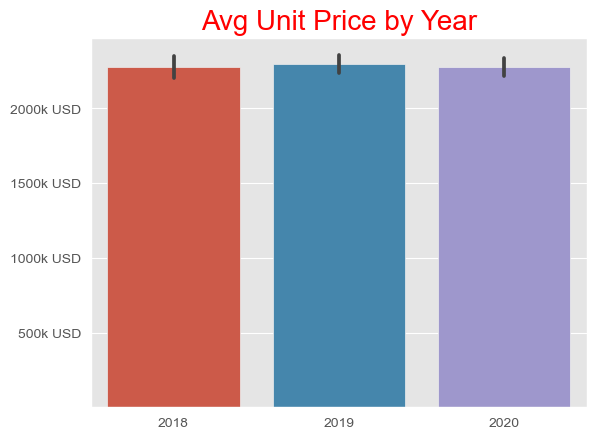

In [276]:
sns.barplot(x="OrderYear", y="Unit Price", data=USRegional_Sales)
plt.title("Avg Unit Price by Year", fontsize=20, color="red"),
plt.ylabel(""),
plt.xlabel(""),
ticks = list(range(500, 2500, 500))
plt.yticks(ticks, [f"{x}k USD" for x in ticks])
style.use("ggplot")
print("The year 2019 had the highest average unit price")

###### Average Unit Price by Month Barplot

The highest average unit price by month was January


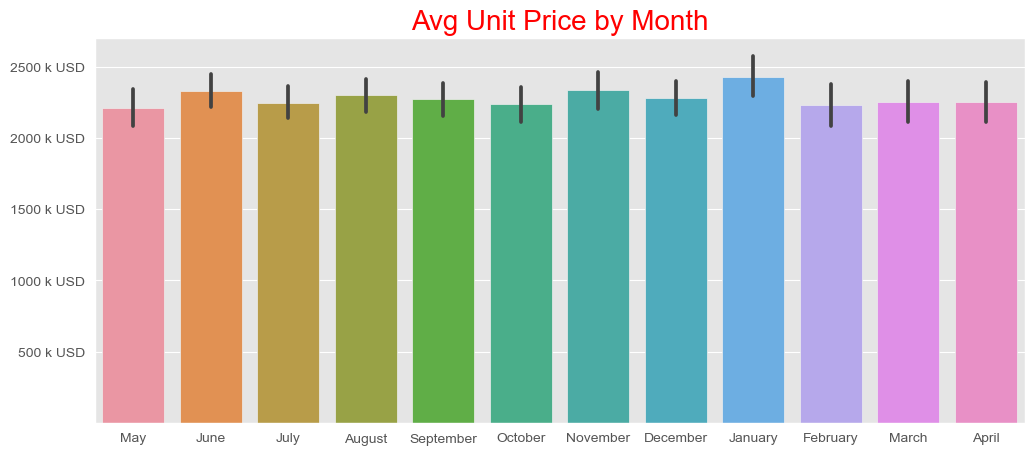

In [270]:
plt.figure(figsize=(12,5))
sns.barplot(x="OrderMonth", y="Unit Price", data=USRegional_Sales)
plt.title("Avg Unit Price by Month", fontsize=20, color="red"),
plt.ylabel(""),
plt.xlabel(""),
ticks = list(range(500, 3000, 500))
plt.yticks(ticks, [f"{x} k USD" for x in ticks])
print("The highest average unit price by month was January")

###### Average Unit Price by Day Barplot

Thursdays have the highest average unit price


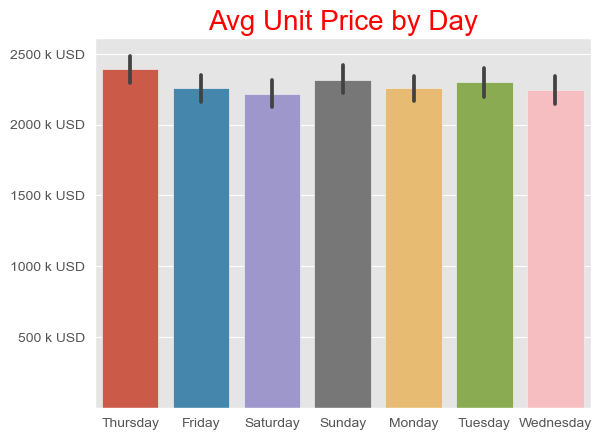

In [275]:
sns.barplot(x="OrderDay", y="Unit Price", data=USRegional_Sales)
plt.title("Avg Unit Price by Day", fontsize=20, color="red"),
plt.ylabel(""),
plt.xlabel(""),
ticks = list(range(500, 3000, 500))
plt.yticks(ticks, [f"{x} k USD" for x in ticks])
print("Thursdays have the highest average unit price")

###### Top 10 Sales Team Members who sold the most Orders Barchart

The graph shows us that sales team member number 17 has sold the most number of products


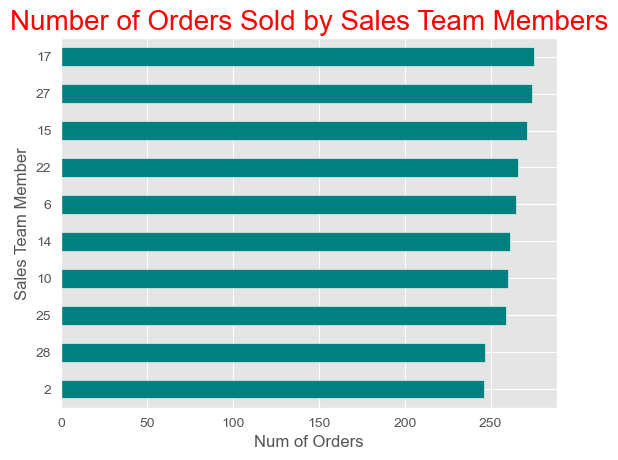

In [442]:
USRegional_Sales.groupby("_SalesTeamID")["Order Quantity"].count().sort_values(ascending=True)[:10].plot(kind="barh", color="teal"),
plt.title("Number of Orders Sold by Sales Team Members", fontsize=20, color="red"),
plt.ylabel("Sales Team Member"),
plt.xlabel("Num of Orders")
style.use("ggplot")
print("The graph shows us that sales team member number 17 has sold the most number of products")

###### Top 10 Sales Team Members with the highest Avg Unit Price Sold Barchart

Sales team member 24 averages the highest in unit prices sold


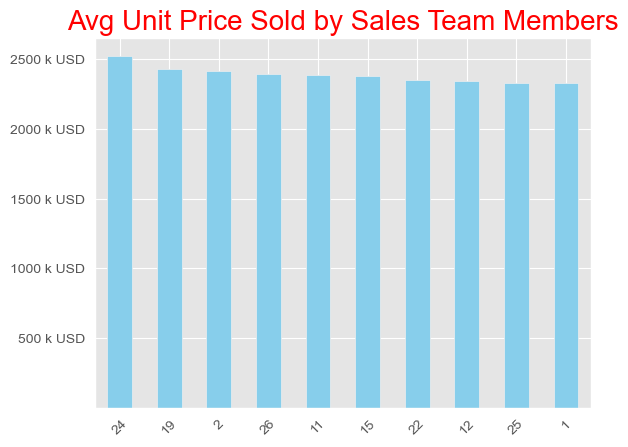

In [443]:
USRegional_Sales.groupby("_SalesTeamID")["Unit Price"].mean().sort_values(ascending=False)[:10].plot(kind="bar", rot=45, color="skyblue"),
plt.title("Avg Unit Price Sold by Sales Team Members", fontsize=20, color="red"),
plt.ylabel(""),
plt.xlabel("")
ticks = list(range(500, 3000, 500))
plt.yticks(ticks, [f"{x} k USD" for x in ticks])
style.use("dark_background")
print("Sales team member 24 averages the highest in unit prices sold")

###### Number of Orders by Sales Channel Countplot

This graph shows us that the most orders by sales channel comes from in-store purchases


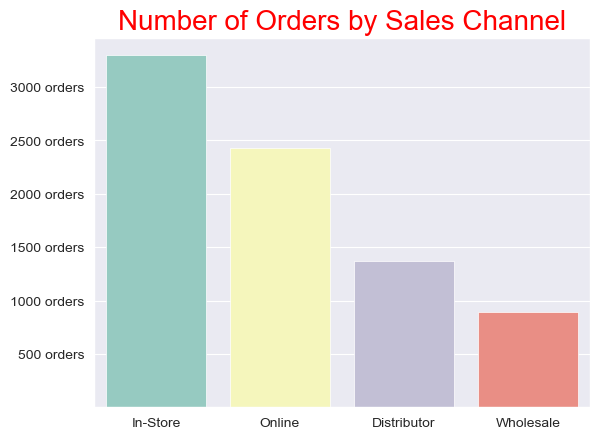

In [352]:
sns.countplot(x="Sales Channel", data=USRegional_Sales)
plt.title("Number of Orders by Sales Channel", fontsize=20, color="red"),
plt.xlabel(""),
plt.ylabel("")
ticks = list(range(500, 3500, 500))
plt.yticks(ticks, [f"{x} orders" for x in ticks])
sns.set_style("dark")
print("This graph shows us that the most orders by sales channel comes from in-store purchases")


###### Percentage of Order Quantity by Sales Channel Piechart

The pie chart shows us that the highest percentage of most orders by sales channel come from in-store purchases


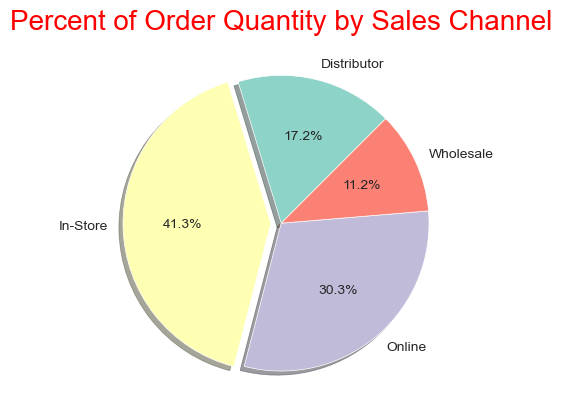

In [408]:
e = [0, 0.07, 0, 0]
USRegional_Sales.groupby("Sales Channel")["Order Quantity"].count().plot(kind="pie", autopct="%1.1f%%", startangle=45, explode=e, shadow=True),
plt.title("Percent of Order Quantity by Sales Channel", fontsize=20, color="red"),
plt.ylabel(""),
plt.xlabel(""),
sns.set_style("white")
print("The pie chart shows us that the highest percentage of most orders by sales channel come from in-store purchases")

###### Average Unit Price by Sales Channel Linechart

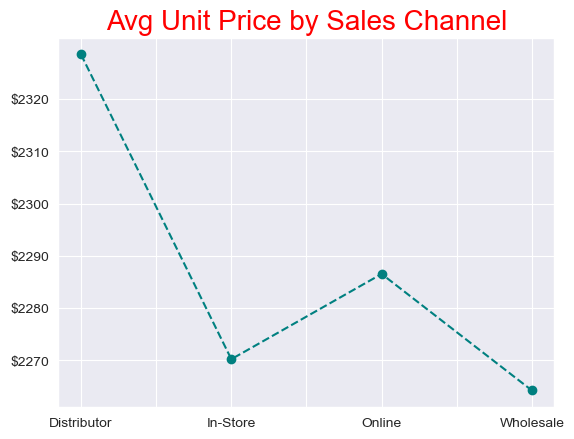

In [422]:
USRegional_Sales.groupby("Sales Channel")["Unit Price"].mean().plot(color="teal", linestyle="--", marker="o", label="line with marker"),
plt.title("Avg Unit Price by Sales Channel", fontsize=20, color="red"),
plt.xlabel(""),
plt.ylabel("")
ticks = list(range(2270, 2330, 10))
plt.yticks(ticks, [f"${x}" for x in ticks])
sns.set_style("dark")

###### Average Unit Price by Customers Histogram

Histogram


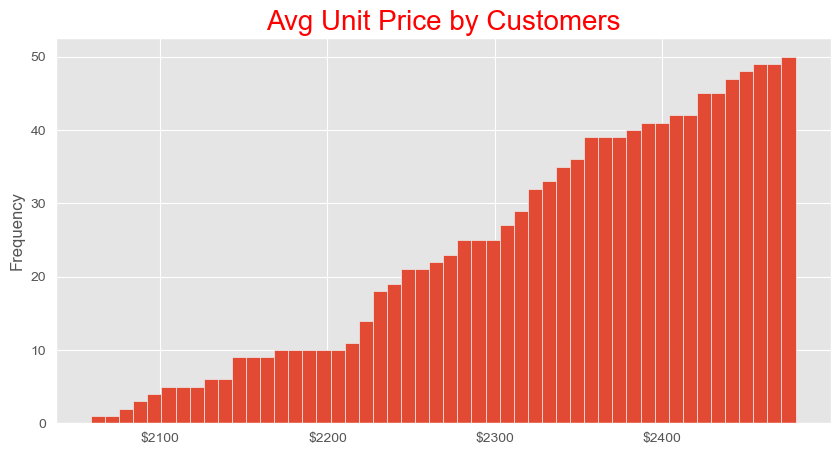

In [446]:
plt.figure(figsize=(10,5))
USRegional_Sales.groupby("_CustomerID")["Unit Price"].mean().plot(kind="hist", bins=50, cumulative=True)
plt.title("Avg Unit Price by Customers", color="red", fontsize=20),
ticks = list(range(2100, 2500, 100))
plt.xticks(ticks, [f"${x}" for x in ticks])
style.use("ggplot")
print("Histogram")

###### Average Profit by Year Piechart

The pie chart indicates that 2019 was the year that saw the highest average profits


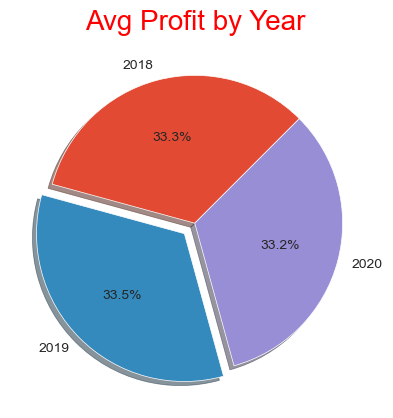

In [451]:
e = [0, 0.1, 0]
avg_markup_price_by_year.plot(kind="pie", shadow=True, autopct="%1.1f%%", startangle=45, explode=e)
plt.title("Avg Profit by Year", fontsize=20, color="red"),
plt.ylabel("") 
print("The pie chart indicates that 2019 was the year that saw the highest average profits")

###### Average Profit by Month Linechart

This graph shows that the month of January has the highest average profits


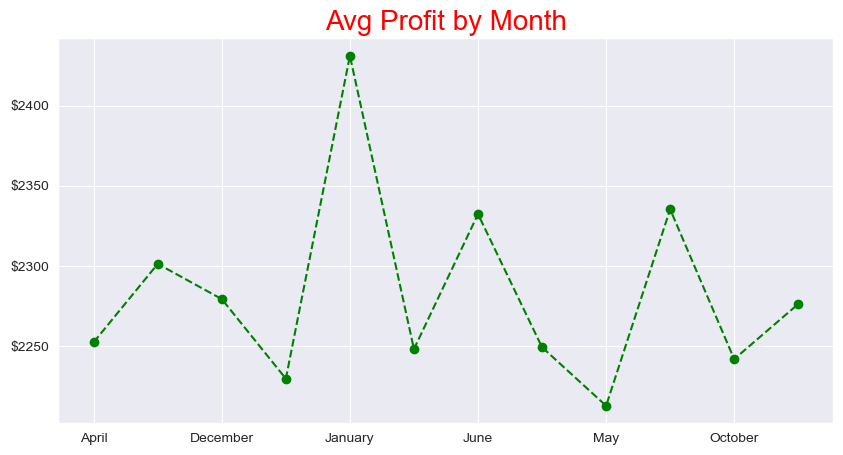

In [457]:
plt.figure(figsize=(10,5))
avg_markup_price_by_month.plot(color="green", linestyle="--", marker="o", label="line with marker"),
plt.title("Avg Profit by Month", fontsize=20, color="red"),
plt.xlabel(""),
ticks = list(range(2250, 2450, 50))
plt.yticks(ticks, [f"${x}" for x in ticks])
print("This graph shows that the month of January has the highest average profits")

###### Average Profit by Day Linechart

The graph shows us that Thursdays experience the highest average profits


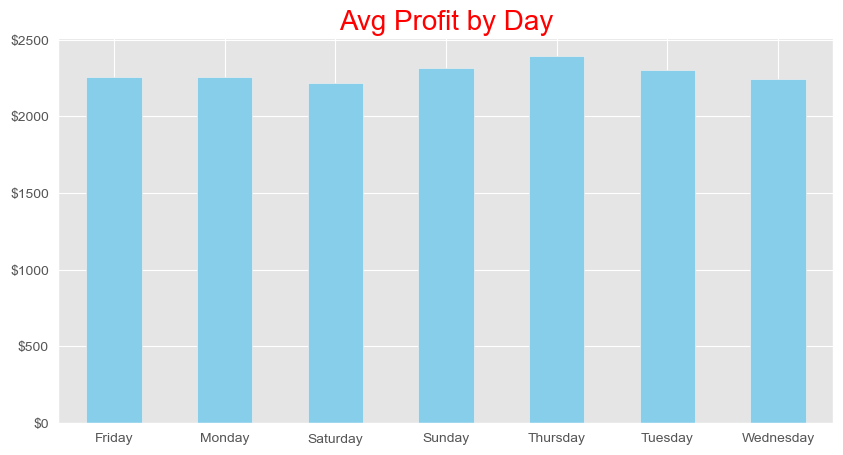

In [447]:
plt.figure(figsize=(10, 5))
avg_markup_price_by_day.plot(kind="bar", rot=0, color="skyblue"),
plt.title("Avg Profit by Day", fontsize=20, color="red")
plt.xlabel("")
ticks = list(range(0, 3000, 500))
plt.yticks(ticks, [f"${x}" for x in ticks])
style.use("ggplot")
print("The graph shows us that Thursdays experience the highest average profits")